In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\envs\pml376\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
C:\anaconda3\envs\pml376\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
np.random.seed(0)

In [6]:
X,y = make_blobs(n_samples=5000,centers=[[4,4],[-2,-1],[2,-3],[1,1]],cluster_std=0.9)
X.shape

(5000, 2)

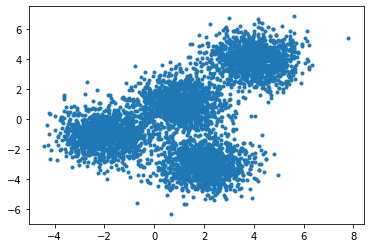

In [7]:
plt.scatter(X[:,0],X[:,1],marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [10]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [12]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [15]:
k_means_labels = k_means.labels_
k_means_labels
with np.printoptions(threshold=np.inf):
    print(k_means_labels)

[3 3 0 0 3 1 2 0 2 2 3 2 1 3 0 2 1 0 3 1 1 0 1 1 2 2 0 0 3 3 1 2 2 3 0 3 1
 2 3 1 0 2 2 3 1 2 0 3 2 0 3 3 2 2 3 2 0 3 2 1 3 1 2 3 1 3 2 2 0 0 2 0 1 3
 3 3 1 1 3 3 2 2 1 3 0 0 2 1 0 2 1 0 3 0 0 3 0 1 2 0 0 3 0 2 1 1 0 3 1 0 0
 0 1 2 1 3 3 1 2 2 0 1 0 0 0 0 3 0 1 3 1 2 3 3 0 2 3 0 1 3 1 2 0 1 1 1 1 0
 2 1 1 1 1 1 0 3 1 1 3 2 1 1 3 2 2 1 2 2 3 1 1 1 2 0 1 2 2 0 3 3 0 1 2 0 0
 2 0 0 1 0 3 0 1 0 1 1 3 0 3 1 0 2 3 2 2 1 3 2 3 3 3 2 1 1 2 0 2 2 2 1 1 1
 2 2 1 2 3 2 3 2 1 0 0 2 3 1 1 3 2 2 0 3 0 3 1 3 1 2 2 1 1 0 0 3 1 3 2 2 2
 0 2 2 0 1 1 1 2 3 1 0 0 3 1 0 3 3 0 1 0 1 0 3 1 3 3 1 2 1 1 3 0 2 0 3 2 1
 1 0 0 2 3 0 1 3 2 1 1 0 1 3 0 0 0 0 3 0 3 0 2 3 1 3 0 0 1 0 0 0 0 2 2 2 1
 2 1 1 2 3 3 2 2 2 2 2 2 2 2 0 0 0 2 0 2 1 3 3 2 0 2 3 2 1 1 3 2 3 2 1 1 3
 0 1 2 0 0 2 1 1 2 1 3 1 1 1 2 1 1 0 1 0 0 3 0 1 0 0 2 3 3 3 0 0 0 1 3 1 0
 2 2 1 0 3 0 2 2 2 3 3 3 0 3 1 1 1 3 1 0 0 1 1 1 2 0 1 3 1 3 0 0 0 1 3 0 0
 0 1 3 2 2 1 2 1 1 1 1 1 3 0 0 1 3 0 1 3 0 1 2 1 3 2 3 3 3 2 1 1 2 0 1 3 0
 2 2 3 0 2 2 1 2 1 2 3 3 

In [20]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.01557176,  1.03442098],
       [ 2.00811148, -3.01440138],
       [ 3.99211079,  3.99540917],
       [-1.95489462, -1.03564706]])

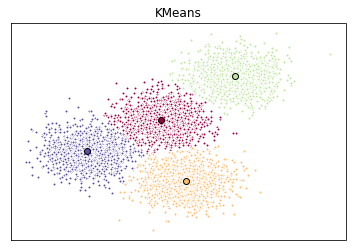

In [21]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice

Try to cluster the above dataset into 7 clusters.  
Notice: do not generate data again, use the same dataset as above.


In [26]:
k_means7 = KMeans(init="k-means++",n_clusters=7,n_init=12)
k_means7.fit(X)

KMeans(n_clusters=7, n_init=12)

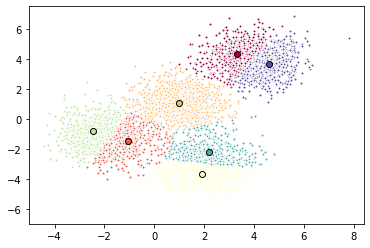

In [27]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


In [30]:
import pandas as pd
cust_df = pd.read_csv("data.csv",encoding='latin1')
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [46]:
#We need to eliminate non-numeric values so that Euclidean Distance function can process data.
df = cust_df.drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate','Country','CustomerID'])
df.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [47]:
#Normalizing

from sklearn.preprocessing import StandardScaler

X= df.values[:,1:]
X= np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.02130135],
       [-0.01262006],
       [-0.01923438],
       ...,
       [-0.00476555],
       [-0.00476555],
       [ 0.00350235]])

In [48]:
    
clusterNum = 3
c_means = KMeans(init = "k-means++",n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [52]:
df["Clus_km"] = labels
df.head(5)

,Quantity,UnitPrice,Clus_km
0,6,2.55,0
1,6,3.39,0
2,8,2.75,0
3,6,3.39,0
4,6,3.39,0


In [53]:
df.groupby('Clus_km').mean()

,Quantity,UnitPrice
Clus_km,,
0,9.553114,3.942518
1,-0.638889,5433.441667
2,-0.555556,14213.947778
3,-1.000000,38970.000000


In [56]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


IndexError: index 2 is out of bounds for axis 1 with size 1